# Mnist classification

### Grid Search for best Hyperparameters

In [1]:
from sklearn.datasets import load_digits

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn import svm

In [5]:
import multiprocessing

In [6]:
cpus=multiprocessing.cpu_count()

In [8]:
print(cpus)

4


In [9]:
params =[
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }
]

# Dataset Prepare

In [10]:
data=load_digits()

In [21]:
X=data.data
Y=data.target

In [51]:
def sample(img):
    img=img.reshape((8,8))
    plt.imshow(img,cmap='gray')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [58]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
cross_val_score(lr,X_test,y_test,scoring="accuracy",cv=5).mean()

c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence th

0.9679451676922468

# Logistic Regression gives around 96% accuracy

In [24]:
from sklearn import svm

In [63]:
svc = svm.SVC()
svc.fit(X_train,y_train)
cross_val_score(svc,X_test,y_test,scoring="accuracy",cv=5).mean()

c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

0.17013491092606575

In [26]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring="accuracy",cv=5,n_jobs = cpus)

In [64]:
gs.fit(X_train,y_train)

c:\users\pankaj jaiswal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [65]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
gs.best_score_

0.9858686616791354

In [67]:
gs.predict(X[450:500])

array([4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1,
       7, 4, 6, 3, 1, 3, 9, 1, 9, 6, 9, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1,
       7, 5, 4, 4, 7, 2])

In [68]:
Y[450:500]

array([4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1,
       7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1,
       7, 5, 4, 4, 7, 2])

In [69]:
import matplotlib.pyplot as plt

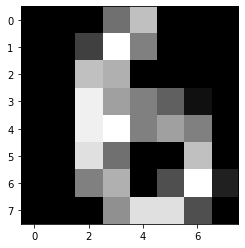

In [156]:
sample(X_test[:1])

In [157]:
y_test[:1]

array([6])

In [158]:
gs.predict(X_test[:1])

array([6])